### Importing the Data

In [189]:
import pandas as pd
column_names = [
    'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
    'acceleration', 'model year', 'origin', 'car name'
]
df = pd.read_csv('./auto-mpg/auto-mpg.data',delim_whitespace=True)
df.columns = column_names
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
394,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


### Data Analysis and Cleaning

In [190]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.528463,5.448363,193.139798,2969.080605,15.577078,76.025189,1.574307
std,7.820926,1.698329,104.244898,847.485218,2.755326,3.689922,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.900000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.200000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [191]:
df.replace('?',pd.NA,inplace=True)

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    391 non-null    object 
 4   weight        397 non-null    float64
 5   acceleration  397 non-null    float64
 6   model year    397 non-null    int64  
 7   origin        397 non-null    int64  
 8   car name      397 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.0+ KB


In [193]:
df.isna().any()

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [194]:
df.isnull().sum() 

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [195]:
df = df.drop('car name',axis=1)
df = df.dropna()

In [196]:
df['horsepower'] = df['horsepower'].astype(float)

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 0 to 396
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           391 non-null    float64
 1   cylinders     391 non-null    int64  
 2   displacement  391 non-null    float64
 3   horsepower    391 non-null    float64
 4   weight        391 non-null    float64
 5   acceleration  391 non-null    float64
 6   model year    391 non-null    int64  
 7   origin        391 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 27.5 KB


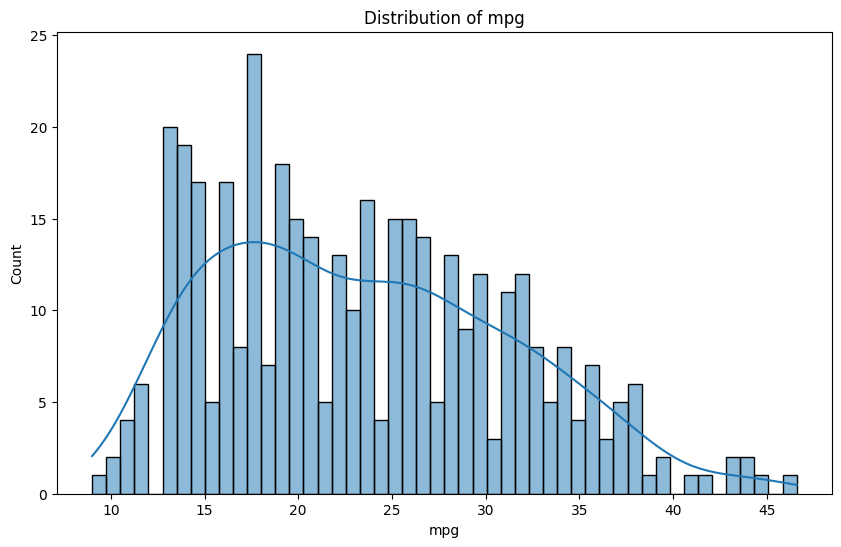

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(df['mpg'], bins=50, kde=True)
plt.title('Distribution of mpg')
plt.xlabel('mpg')
plt.ylabel('Count')
plt.show()


In [199]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

fig = px.box(df, y="mpg")
fig.update_layout(title="Boxplot of MPG",
                  yaxis_title="values",
                  xaxis_title="MPG",
                  height=600)


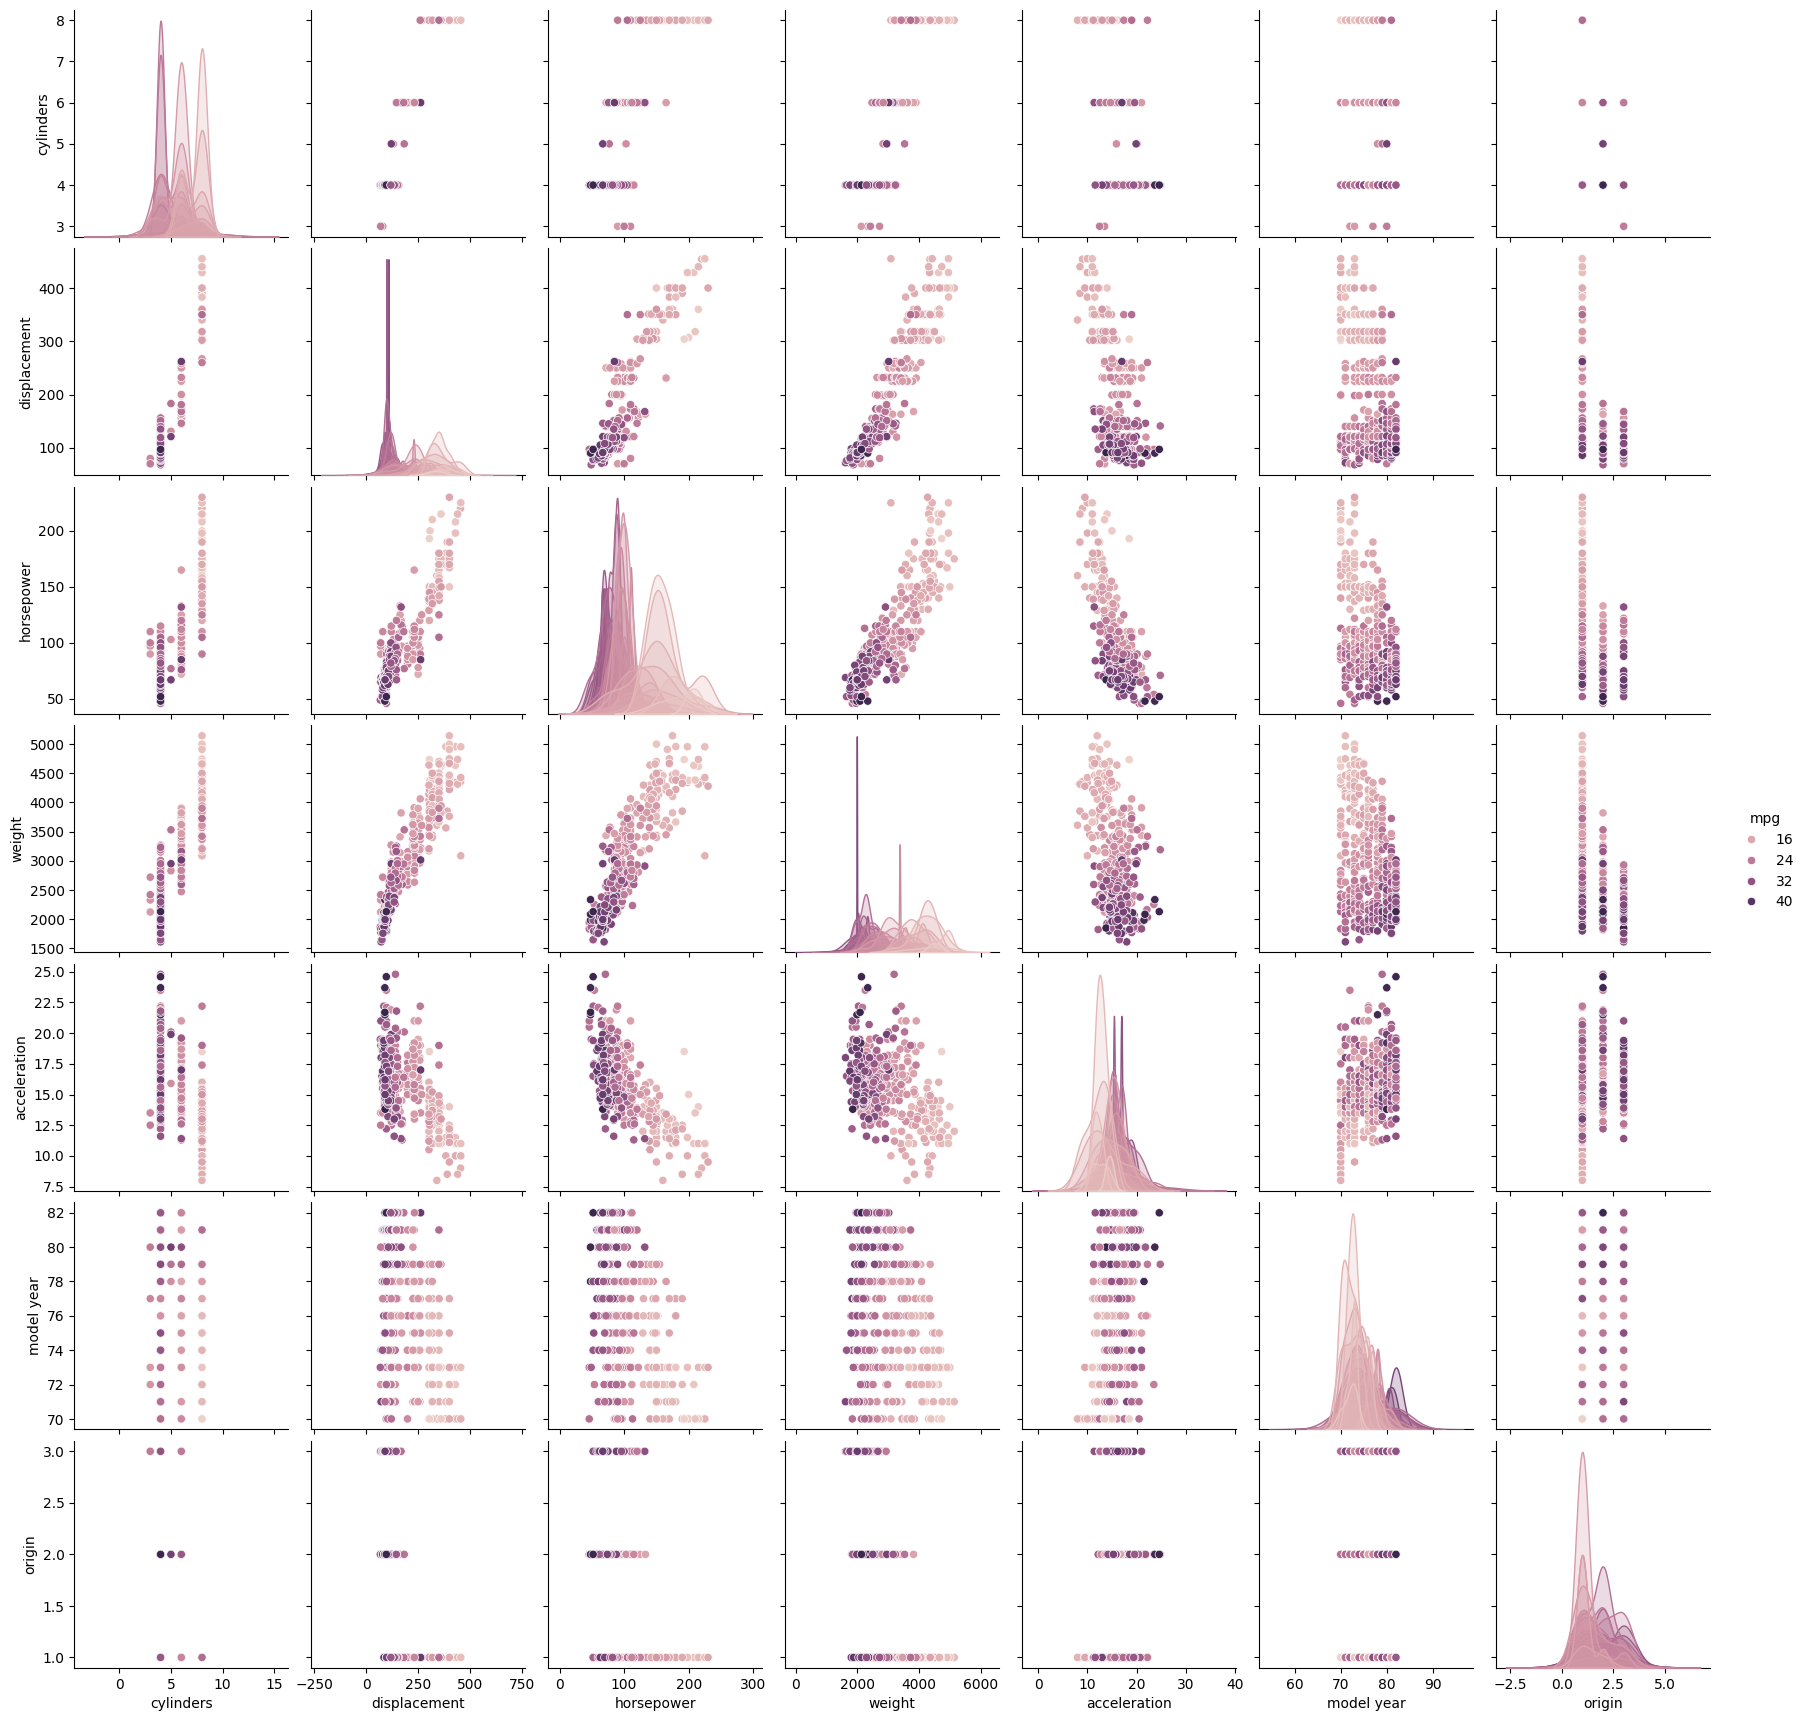

In [200]:
sns.pairplot(df,diag_kind='kde',hue='mpg')

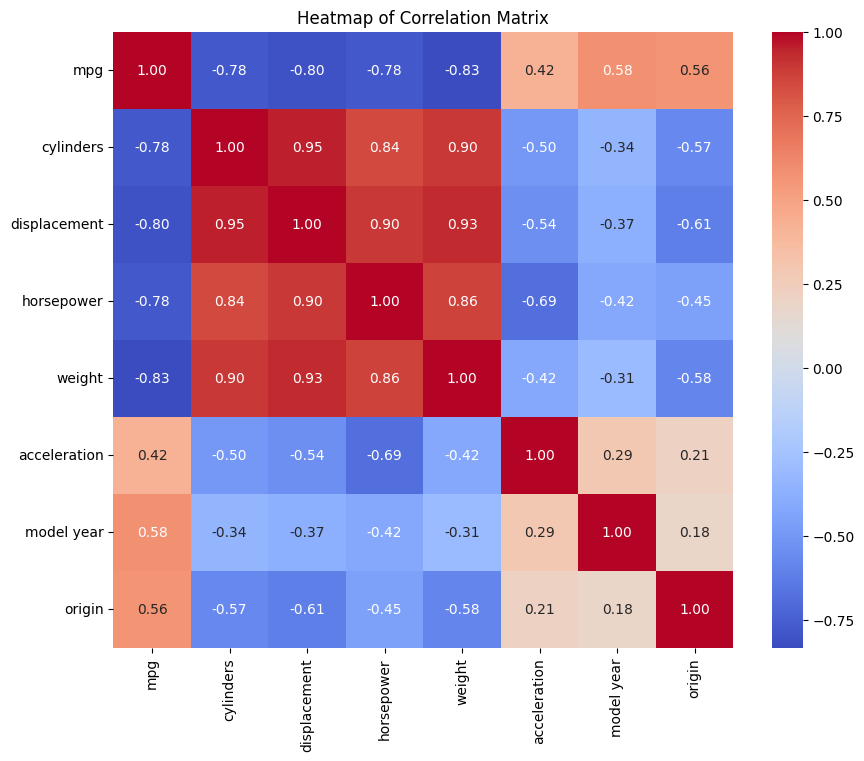

In [201]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()


### Model Building

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x = df.drop('mpg',axis=1)
y = df['mpg']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
scaler = StandardScaler()


x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x.columns, index=x_train.index)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x.columns, index=x_test.index)


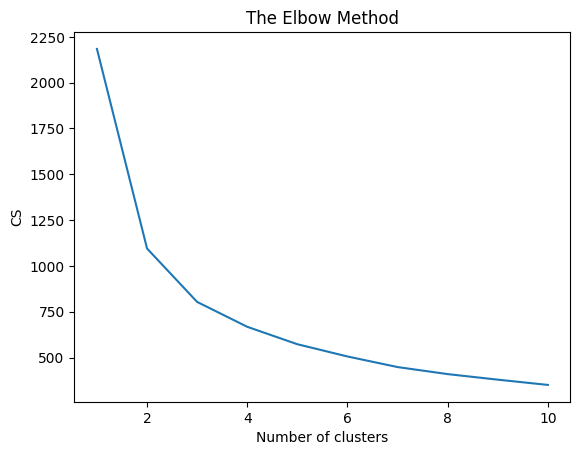

In [203]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(x_train)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()


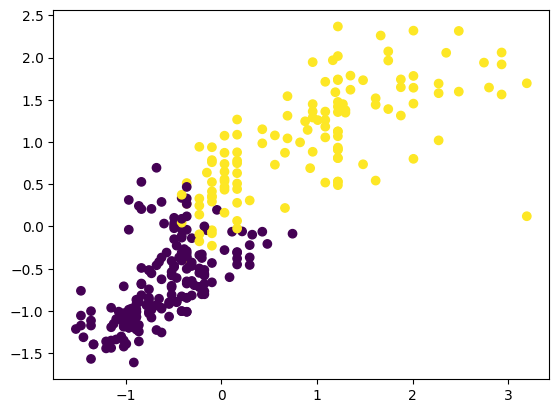

In [204]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,random_state=42)
kmeans.fit(x_train)

labels = kmeans.labels_
plt.scatter(x_train['horsepower'],x_train['weight'],c=labels)

In [205]:
kmeans.labels_

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,

In [206]:
from sklearn.metrics import silhouette_score

silhouette_score(x_train,labels)

0.40900310397902667

In [207]:
cluster1 = x_train[labels==0]
cluster1

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
342,-0.856907,-1.102903,-1.204478,-1.443084,0.468631,1.341984,1.753995
359,0.313137,-0.471780,-0.730618,0.208601,1.442422,1.341984,0.524228
241,-0.856907,-0.701279,0.164450,-0.449722,-1.010089,0.233582,0.524228
141,-0.856907,-1.102903,-0.967548,-1.198564,-0.036298,-0.597720,0.524228
370,-0.856907,-0.567404,-0.520014,-0.537890,0.144034,1.619085,-0.705540
...,...,...,...,...,...,...,...
396,-0.856907,-0.720404,-0.572665,-0.308653,1.370290,1.619085,-0.705540
20,-0.856907,-0.835154,-0.362061,-0.649570,-0.396961,-1.706123,0.524228
107,-0.856907,-0.930779,-0.414712,-0.827082,1.226024,-0.874821,1.753995
272,-0.856907,-0.720404,-0.177782,-0.678959,-0.252696,0.510682,1.753995


In [208]:
cluster2 = x_train[labels == 1]
cluster2

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
64,1.483181,1.498091,1.296449,1.347734,-0.937956,-1.151922,-0.70554
221,1.483181,0.627906,0.164450,1.266619,1.226024,0.233582,-0.70554
85,1.483181,1.048655,1.217472,0.810496,-1.478951,-0.874821,-0.70554
227,0.313137,0.532281,-0.151456,0.637686,1.226024,0.233582,-0.70554
251,0.313137,0.350594,0.032823,0.649442,1.298157,0.510682,-0.70554
...,...,...,...,...,...,...,...
100,0.313137,0.035032,-0.230433,-0.092347,0.144034,-0.874821,-0.70554
88,1.483181,1.182529,1.217472,0.933931,-1.118288,-0.874821,-0.70554
190,0.313137,0.293219,-0.098805,0.294418,-0.072364,-0.043519,-0.70554
72,1.483181,1.077342,0.690961,1.311291,-0.577293,-1.151922,-0.70554


In [209]:
from sklearn.linear_model import LinearRegression

regressor1 = LinearRegression()
regressor2 = LinearRegression()

r1 = regressor1.fit(cluster1,y_train[cluster1.index])
r2 = regressor2.fit(cluster2,y_train[cluster2.index])


In [210]:
x_test.iloc[0].values

array([ 1.48318091,  1.80409048,  1.74398329,  0.68235779, -2.01994597,
       -1.70612318, -0.7055396 ])

In [211]:
test_cluster_labels = kmeans.predict(x_test)
x_test.iloc[78]

cylinders       1.483181
displacement    1.029530
horsepower      0.927891
weight          0.261502
acceleration   -1.587150
model year      0.510682
origin         -0.705540
Name: 263, dtype: float64

In [212]:
import warnings
warnings.filterwarnings('ignore')
test_cluster_labels = kmeans.predict(x_test)

regressor1.predict((x_test.iloc[0].values).reshape(1,-1))

predicted_mpg = []
count = 0
for i in range(len(x_test)):
    if test_cluster_labels[i] == 0:
        mpg_prediction = regressor1.predict((x_test.iloc[i].values).reshape(1,-1))[0]
    else:
        mpg_prediction = regressor2.predict((x_test.iloc[i].values).reshape(1,-1))[0]
    predicted_mpg.append(mpg_prediction)
    count += 1

In [213]:
predicted_mpg

[14.887408734377287,
 10.472364133055681,
 17.40330135868315,
 25.20328014302956,
 37.81354411950489,
 34.061084205777725,
 24.03331367159028,
 24.66639756343441,
 19.44521791255366,
 14.969702676566136,
 29.960922253063682,
 13.773532054157062,
 19.513332364466603,
 30.31825771566773,
 36.33900269809996,
 21.062208100270436,
 11.151605325665377,
 18.271531565856666,
 19.86702866890416,
 30.72349376324459,
 14.329706669299327,
 31.406749648902156,
 36.10461846808827,
 23.929217799051912,
 22.506909122920224,
 17.66576302281089,
 31.258442337945482,
 24.937554965075847,
 35.73387308821819,
 29.328985486675023,
 26.472285268037005,
 18.268880525849013,
 19.389501116174696,
 13.640323876808763,
 18.318720854325154,
 26.53191278530047,
 31.938248504262443,
 10.971296902353625,
 24.556703587199983,
 23.466237873063083,
 26.420617245122806,
 35.595197395917275,
 13.7531294070273,
 31.328114783107562,
 32.888133087183,
 13.605717779956265,
 25.47327493024268,
 19.670939216700575,
 29.86702655

### r2_score using KMeans clustering based Regression

In [214]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predicted_mpg)
r2

0.8696059449695639

### r2_score using LinearRegression

In [215]:
rr = LinearRegression()
z11 = rr.fit(x_train,y_train)

pred = rr.predict(x_test)

from sklearn.metrics import r2_score

r2 = r2_score(y_test, pred)
r2

0.7928080507345399

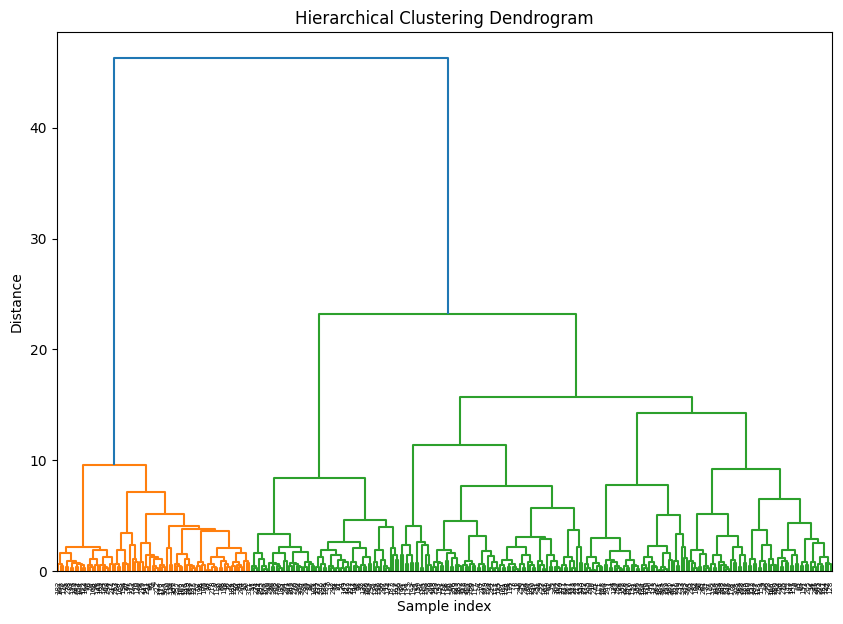

In [216]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

X = x_train.to_numpy()

Z = linkage(X, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [231]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LinearRegression
import numpy as np

class HClusteringBasedRegression:
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        self.regressors = []
        self.clusters = []
        self.hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    
    def fit(self, x, y):
        self.hierarchical.fit(x)
        labels = self.hierarchical.labels_

        for i in range(self.n_clusters):
            cluster = x[labels == i]
            self.clusters.append(cluster)

        for i in range(self.n_clusters):
            regressor = LinearRegression()
            cluster_indices = labels == i
            regressor.fit(x[cluster_indices], y[cluster_indices])
            self.regressors.append(regressor)

    def predict(self, x):
        labels = self.hierarchical.fit_predict(x)
        predictions = []
        for i in range(len(x)):
            cluster = labels[i]
            prediction = self.regressors[cluster].predict((x.iloc[i].values).reshape(1,-1))[0]
            predictions.append(prediction)
        return predictions

cbr = HClusteringBasedRegression(2)
cbr.fit(x_train, y_train)
predictions = cbr.predict(x_test)
predictions

[14.523168737099684,
 11.554197069900532,
 14.989196149128535,
 25.40441800397567,
 37.44569862005541,
 34.03456460621577,
 24.341522724209568,
 24.947316239612913,
 22.095992007327506,
 14.356516151731505,
 29.749223358986875,
 14.320133837734216,
 19.84711116072699,
 30.29063449540628,
 36.08143735197194,
 22.155771305299897,
 12.141681081883164,
 18.738914372308066,
 20.796097933899294,
 30.650331814815807,
 13.953551065288199,
 31.19775902542456,
 35.79185261272778,
 24.179430409735385,
 22.70290601627072,
 15.089991924094349,
 31.073905153834104,
 25.401394598997438,
 35.519825817184575,
 29.339959344593083,
 27.414760179518385,
 16.951046800923244,
 19.607269229130175,
 12.693422037741751,
 17.81903845180375,
 26.5347391958299,
 31.607940063072604,
 11.196843879485193,
 24.7798302763806,
 23.746201858842614,
 26.40971908473895,
 35.25279617660353,
 13.726691717789063,
 31.37813036690774,
 32.59361411271502,
 13.537559883069356,
 25.377327253137437,
 18.999091164500324,
 29.619637

### r2_score using hierarchical clustering based regression

In [232]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
r2

0.853869214388906

### Random Forest

In [219]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [220]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(x_train, y_train)
y_pred = rf_regressor.predict(x_test)



In [221]:
r2 = r2_score(y_test, y_pred)

print(f'R-squared Score: {r2}')


R-squared Score: 0.902922647697235


### K-Means + Random Forest

In [222]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import warnings

warnings.filterwarnings('ignore')

class ClusteringBasedRandomForestRegression:
    def __init__(self, n_clusters, random_state):
        self.n_clusters = n_clusters
        self.regressors = []
        self.clusters = []
        self.kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    
    def fit(self, X, y):
        self.kmeans.fit(X)
        labels = self.kmeans.labels_

        for i in range(self.n_clusters):
            cluster = X[labels == i]
            self.clusters.append(cluster)

        for i in range(self.n_clusters):
            regressor = RandomForestRegressor(random_state=42)
            regressor.fit(self.clusters[i], y[self.clusters[i].index])
            self.regressors.append(regressor)

    def predict(self, X):
        labels = self.kmeans.predict(X)
        predictions = []
        for i in range(len(X)):
            cluster = labels[i]
            prediction = self.regressors[cluster].predict(X.iloc[i].values.reshape(1, -1))[0]
            predictions.append(prediction)
        return predictions

cbr = ClusteringBasedRandomForestRegression(n_clusters=2, random_state=42)
cbr.fit(x_train, y_train)
y_pred = cbr.predict(x_test)

In [223]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
r2

0.9109653546397556

### Hirarchial Clustering + Random Forest

In [229]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

class HClusteringBasedRandomForestRegression:
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        self.regressors = []
        self.clusters = []
        self.hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    
    def fit(self, x, y):
        self.hierarchical.fit(x)
        labels = self.hierarchical.labels_

        for i in range(self.n_clusters):
            cluster = x[labels == i]
            self.clusters.append(cluster)

        for i in range(self.n_clusters):
            regressor = RandomForestRegressor()
            cluster_indices = labels == i
            regressor.fit(x[cluster_indices], y[cluster_indices])
            self.regressors.append(regressor)

    def predict(self, x):
        labels = self.hierarchical.fit_predict(x)
        predictions = []
        for i in range(len(x)):
            cluster = labels[i]
            prediction = self.regressors[cluster].predict((x.iloc[i].values).reshape(1,-1))[0]
            predictions.append(prediction)
        return predictions

cbr = HClusteringBasedRandomForestRegression(2)
cbr.fit(x_train, y_train)
predictions = cbr.predict(x_test)
predictions

[14.38,
 12.11,
 17.6,
 25.577999999999992,
 35.74899999999999,
 32.858000000000004,
 25.266,
 25.680000000000014,
 20.863000000000003,
 13.275,
 29.798999999999996,
 13.715,
 19.873,
 29.305,
 34.067999999999984,
 20.536000000000005,
 12.08,
 21.721,
 21.014,
 28.602000000000004,
 14.245,
 27.989,
 35.053999999999995,
 24.412000000000003,
 23.366999999999997,
 16.198,
 31.503,
 22.555999999999994,
 34.53999999999998,
 31.85000000000001,
 25.019999999999996,
 18.645,
 19.623999999999995,
 14.685,
 22.600000000000005,
 26.975,
 30.378000000000007,
 13.775,
 24.807000000000002,
 24.784999999999997,
 26.356000000000005,
 40.54799999999997,
 14.015,
 30.61500000000002,
 35.11599999999999,
 14.33,
 27.565,
 20.177000000000003,
 28.36,
 22.089999999999996,
 26.365,
 26.806000000000008,
 24.305999999999997,
 24.002999999999997,
 20.853999999999996,
 26.526999999999997,
 13.505,
 26.263000000000012,
 13.87,
 24.354,
 26.406999999999996,
 35.51199999999999,
 24.78699999999998,
 19.9769999999999

In [230]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
r2

0.8857558415966608

In [226]:
x_train

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
64,1.483181,1.498091,1.296449,1.347734,-0.937956,-1.151922,-0.705540
342,-0.856907,-1.102903,-1.204478,-1.443084,0.468631,1.341984,1.753995
359,0.313137,-0.471780,-0.730618,0.208601,1.442422,1.341984,0.524228
221,1.483181,0.627906,0.164450,1.266619,1.226024,0.233582,-0.705540
85,1.483181,1.048655,1.217472,0.810496,-1.478951,-0.874821,-0.705540
...,...,...,...,...,...,...,...
72,1.483181,1.077342,0.690961,1.311291,-0.577293,-1.151922,-0.705540
107,-0.856907,-0.930779,-0.414712,-0.827082,1.226024,-0.874821,1.753995
272,-0.856907,-0.720404,-0.177782,-0.678959,-0.252696,0.510682,1.753995
352,-0.856907,-0.854279,-0.783269,-0.931708,-0.505160,1.341984,0.524228


In [241]:
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.linear_model import LinearRegression
import warnings
from sklearn.preprocessing import StandardScaler


warnings.filterwarnings('ignore')

class DBClusteringBasedRegression:
    def __init__(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples
        self.regressors = []
        self.clusters = []
        self.dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    
    def fit(self, X, y):
        labels = self.dbscan.fit_predict(X)
        unique_labels = set(labels)
        print(unique_labels)
        for label in unique_labels:
            if label == -1:
                continue
            cluster = X[labels == label]
            self.clusters.append(cluster)
            
            regressor = LinearRegression()
            regressor.fit(cluster, y[labels == label])
            self.regressors.append(regressor)
    
    def predict(self, X):
        labels = self.dbscan.fit_predict(X)
        predictions = []
        
        for i in range(len(X)):
            cluster_label = labels[i]
            if cluster_label == -1:
                prediction = np.mean([regressor.predict(X.iloc[i].values.reshape(1, -1))[0] for regressor in self.regressors])
            else:
                prediction = self.regressors[cluster_label].predict(X.iloc[i].values.reshape(1, -1))[0]
            predictions.append(prediction)
        
        return predictions

cbr = DBClusteringBasedRegression(eps=0.5, min_samples=5)
cbr.fit(x_train, y_train)
y_pred = cbr.predict(x_test)

{0, 1, 2, 3, 4, 5, -1}


In [240]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
r2

-7.132711160913363